In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
train=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/analytics_vidhya_loan_defaulter/train_20D8GL3.csv')
test=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/analytics_vidhya_loan_defaulter/test_O6kKpvt.csv')

In [265]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [266]:
test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [267]:
print(train.shape)
print(test.shape)

(21000, 25)
(9000, 24)


# adding extra column to check train/test

In [268]:
train['train/test']=1
test['train/test']=0

# making train and test into one.

In [269]:
df=pd.concat([train,test])

In [270]:
df.tail()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,ID,LIMIT_BAL,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month,train/test
8995,42,3210,0,0,0,0,0,2,16413,230000,...,-2,0,0,0,0,0,0,2,NaN,0
8996,28,2780,1950,7956,499,0,5990,1,17210,90000,...,-1,1950,7956,499,0,5990,0,2,NaN,0
8997,26,58072,59040,57416,55736,26958,28847,2,24002,60000,...,0,2282,2324,2049,2000,3000,1120,1,NaN,0
8998,23,44830,46185,47208,47241,48212,45849,2,17019,70000,...,0,2100,2079,2500,2000,2000,1700,2,NaN,0
8999,38,51072,49889,39635,35130,33229,32171,2,23415,600000,...,0,0,4000,0,1500,2000,3000,2,NaN,0


# EDA

In [271]:
df.isnull().sum()

AGE                              0
BILL_AMT1                        0
BILL_AMT2                        0
BILL_AMT3                        0
BILL_AMT4                        0
BILL_AMT5                        0
BILL_AMT6                        0
EDUCATION                        0
ID                               0
LIMIT_BAL                        0
MARRIAGE                         0
PAY_0                            0
PAY_2                            0
PAY_3                            0
PAY_4                            0
PAY_5                            0
PAY_6                            0
PAY_AMT1                         0
PAY_AMT2                         0
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
SEX                              0
default_payment_next_month    9000
train/test                       0
dtype: int64

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 26 columns):
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
EDUCATION                     30000 non-null int64
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
MARRIAGE                      30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
PAY_AMT1                 

# checking unique values

In [273]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print()

AGE
56

BILL_AMT1
22723

BILL_AMT2
22346

BILL_AMT3
22026

BILL_AMT4
21548

BILL_AMT5
21010

BILL_AMT6
20604

EDUCATION
7

ID
30000

LIMIT_BAL
81

MARRIAGE
4

PAY_0
11

PAY_2
11

PAY_3
11

PAY_4
11

PAY_5
10

PAY_6
10

PAY_AMT1
7943

PAY_AMT2
7899

PAY_AMT3
7518

PAY_AMT4
6937

PAY_AMT5
6897

PAY_AMT6
6939

SEX
2

default_payment_next_month
2

train/test
2



In [274]:
df.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,ID,LIMIT_BAL,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month,train/test
0,25,20952,12590,3479,3435,8870,2020,2,25150,360000,...,-1,12590,3479,3446,8870,2020,27043,2,0.0,1
1,46,456,0,0,2240,1681,2267,1,13470,240000,...,-1,0,0,2240,0,2267,3074,2,0.0,1
2,41,49846,53811,38717,35409,35036,35939,2,3092,320000,...,0,5000,2000,2000,3000,3000,1500,2,0.0,1
3,24,2675,0,0,0,0,0,2,13973,50000,...,-2,0,0,0,0,0,0,2,1.0,1
4,52,35861,18521,19385,20561,21261,21457,3,10567,80000,...,0,1500,1500,1500,1028,876,1449,1,0.0,1


In [275]:
df.shape

(30000, 26)

# changinf the datatypes

In [276]:
df.columns

Index(['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'EDUCATION', 'ID', 'LIMIT_BAL', 'MARRIAGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX',
       'default_payment_next_month', 'train/test'],
      dtype='object')

In [277]:
cat_cols=['EDUCATION','MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','SEX']

In [278]:
df[cat_cols]=df[cat_cols].astype('object')

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 26 columns):
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
EDUCATION                     30000 non-null object
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
MARRIAGE                      30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
PAY_AMT1         

# checking categorical features.

In [280]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)
        print(df[i].value_counts())
        print()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, 

In [281]:
df['EDUCATION']=df['EDUCATION'].apply(lambda x: 2 if x==0 else x)

In [282]:
df['MARRIAGE']=df['MARRIAGE'].apply(lambda x: 2 if x==0 else x)

In [283]:
df['PAY_0']=df['PAY_0'].apply(lambda x: -1 if x==-2 else x)

In [284]:
df['PAY_2']=df['PAY_2'].apply(lambda x: -1 if x==-2 else x)
df['PAY_3']=df['PAY_3'].apply(lambda x: -1 if  x==-2 else x)
df['PAY_4']=df['PAY_4'].apply(lambda x: -1 if  x==-2 else x)
df['PAY_5']=df['PAY_5'].apply(lambda x: -1 if  x==-2 else x)
df['PAY_6']=df['PAY_6'].apply(lambda x: -1 if  x==-2 else x)

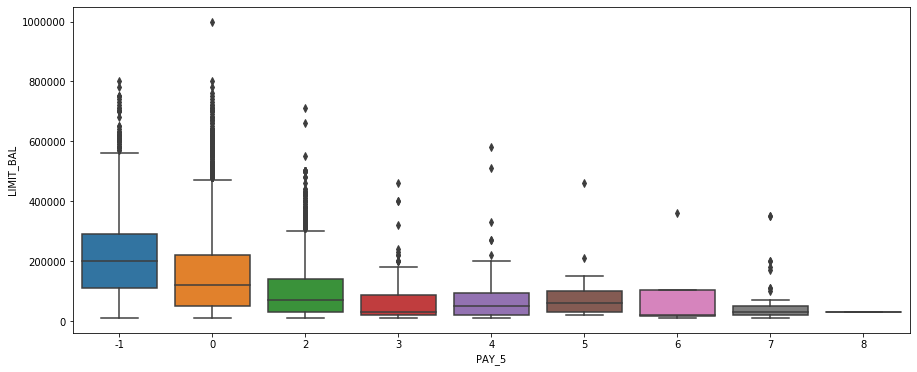

In [285]:
plt.figure(figsize=(15,6))
sns.boxplot(x='PAY_5',y='LIMIT_BAL',data=df)
plt.show()

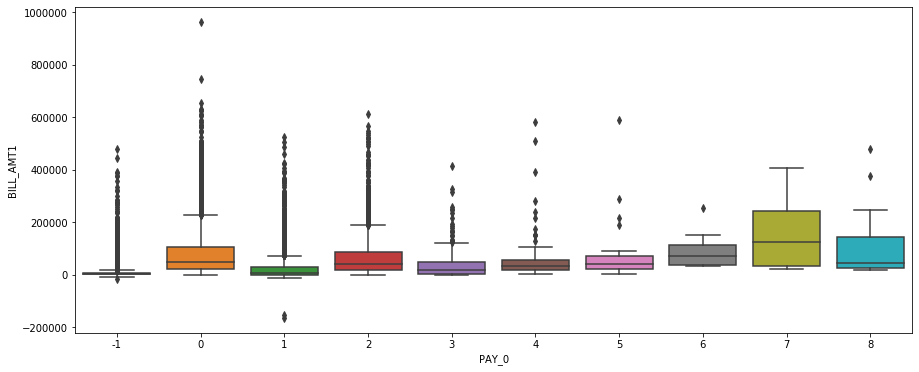

In [286]:
plt.figure(figsize=(15,6))
sns.boxplot(x='PAY_0',y='BILL_AMT1',data=df)
plt.show()

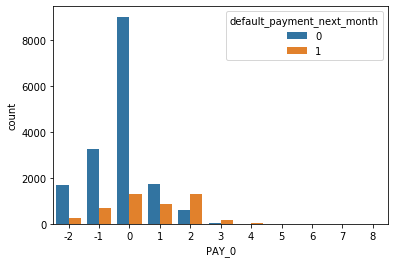

In [287]:
sns.countplot(x='PAY_0',data=train,hue='default_payment_next_month')
plt.show()

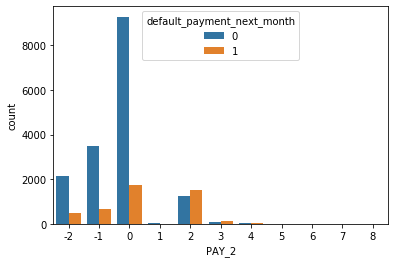

In [288]:
sns.countplot(x='PAY_2',data=train,hue='default_payment_next_month')
plt.show()

In [289]:
train['default_payment_next_month'].value_counts(normalize=True)

0    0.77881
1    0.22119
Name: default_payment_next_month, dtype: float64

# checking numerical values

AGE
AxesSubplot(0.125,0.125;0.775x0.755)


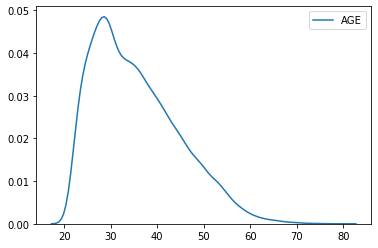


BILL_AMT1
AxesSubplot(0.125,0.125;0.775x0.755)


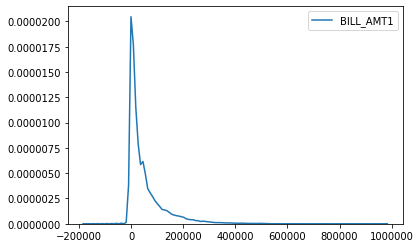


BILL_AMT2
AxesSubplot(0.125,0.125;0.775x0.755)


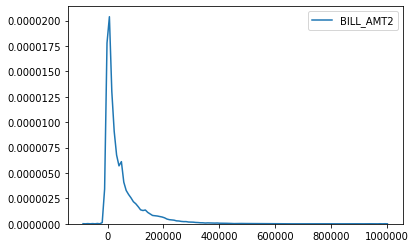


BILL_AMT3
AxesSubplot(0.125,0.125;0.775x0.755)


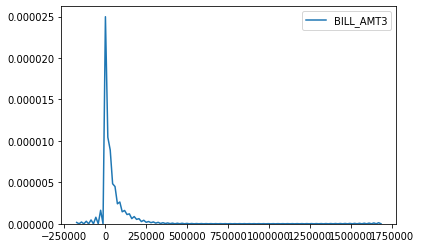


BILL_AMT4
AxesSubplot(0.125,0.125;0.775x0.755)


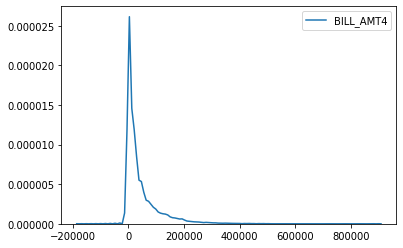


BILL_AMT5
AxesSubplot(0.125,0.125;0.775x0.755)


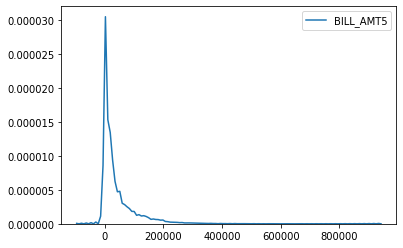


BILL_AMT6
AxesSubplot(0.125,0.125;0.775x0.755)


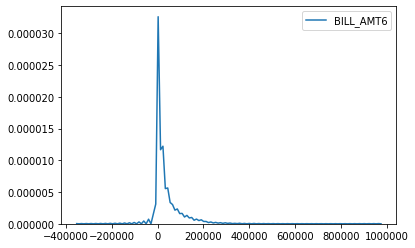


ID
AxesSubplot(0.125,0.125;0.775x0.755)


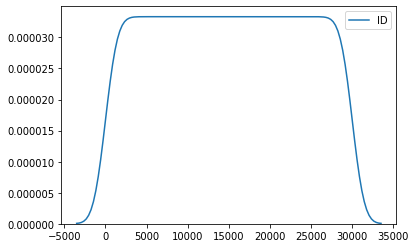


LIMIT_BAL
AxesSubplot(0.125,0.125;0.775x0.755)


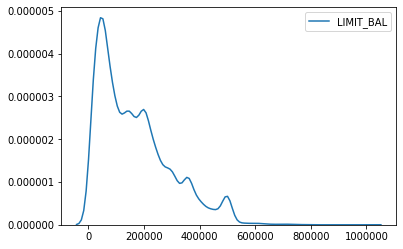


PAY_AMT1
AxesSubplot(0.125,0.125;0.775x0.755)


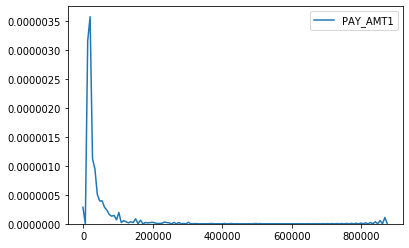


PAY_AMT2
AxesSubplot(0.125,0.125;0.775x0.755)


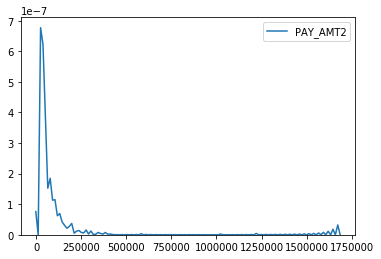


PAY_AMT3
AxesSubplot(0.125,0.125;0.775x0.755)


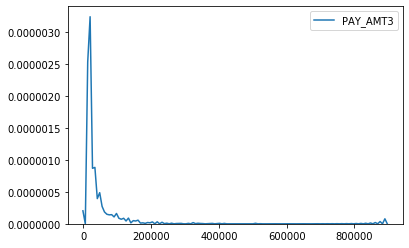


PAY_AMT4
AxesSubplot(0.125,0.125;0.775x0.755)


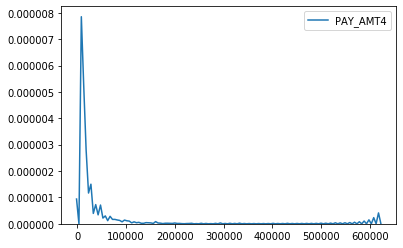


PAY_AMT5
AxesSubplot(0.125,0.125;0.775x0.755)


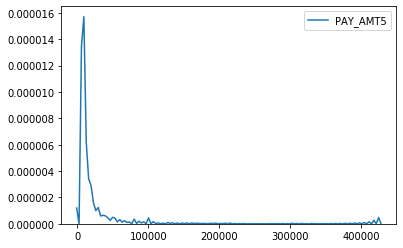


PAY_AMT6
AxesSubplot(0.125,0.125;0.775x0.755)


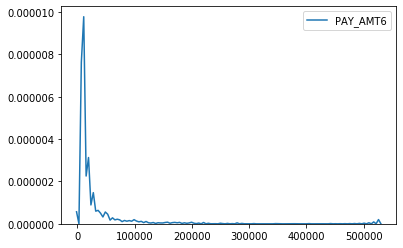


default_payment_next_month
AxesSubplot(0.125,0.125;0.775x0.755)


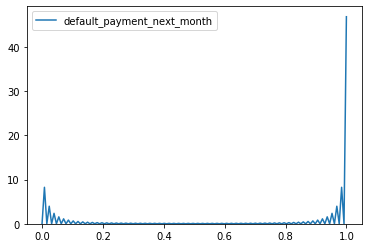


train/test
AxesSubplot(0.125,0.125;0.775x0.755)


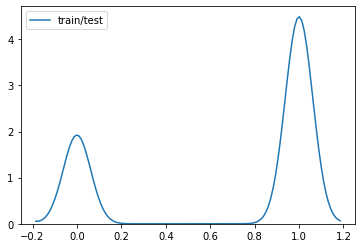

In [290]:
df[cat_cols]=df[cat_cols].astype('object')
for i in df.columns:
    if df[i].dtype!='object':
        print(i)
        print(sns.kdeplot(df[i]))
        plt.show()
        print()

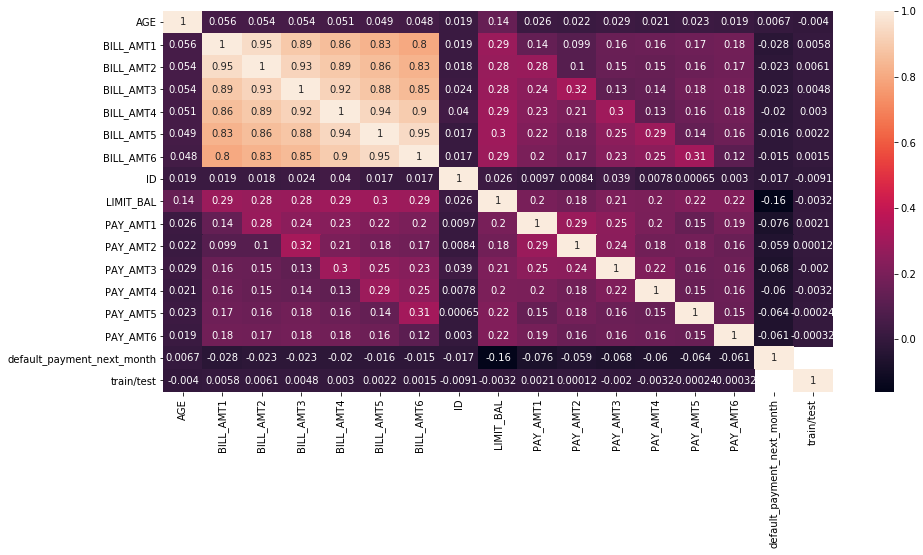

In [291]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [292]:
df.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,ID,LIMIT_BAL,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month,train/test
0,25,20952,12590,3479,3435,8870,2020,2,25150,360000,...,-1,12590,3479,3446,8870,2020,27043,2,0.0,1
1,46,456,0,0,2240,1681,2267,1,13470,240000,...,-1,0,0,2240,0,2267,3074,2,0.0,1
2,41,49846,53811,38717,35409,35036,35939,2,3092,320000,...,0,5000,2000,2000,3000,3000,1500,2,0.0,1
3,24,2675,0,0,0,0,0,2,13973,50000,...,-1,0,0,0,0,0,0,2,1.0,1
4,52,35861,18521,19385,20561,21261,21457,3,10567,80000,...,0,1500,1500,1500,1028,876,1449,1,0.0,1


# splitting train and test:

In [293]:
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]=df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 26 columns):
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
EDUCATION                     30000 non-null object
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
MARRIAGE                      30000 non-null object
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
PAY_AMT1               

In [294]:
#df=df.drop(columns=['ID'],axis=1)

In [295]:
df_train=df[df['train/test']==1]
df_test=df[df['train/test']==0]

In [296]:
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

In [297]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


(21000, 24)
(21000,)
(9000, 24)


# base model

In [298]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear',fit_intercept=True)

In [299]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [300]:
y_train_pred=logreg.predict(x_train)
from sklearn.metrics import roc_auc_score
roc_auc_score=roc_auc_score(y_train,y_train_pred)
print(roc_auc_score)

0.499938856618771


### trying different classifiers

#### standardizing 

In [301]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

logistic_regression:0.730345 (0.000153)
Naive Bayes:0.698133 (0.000225)
knn:0.704515 (0.000399)
decission tree:0.613721 (0.000048)
rf:0.735417 (0.000223)
gboost:0.784700 (0.000162)


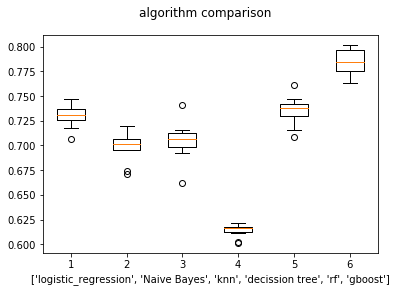

In [303]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_trains,y_trains,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

# feature Engineering (average of bill amount)

In [304]:
df.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,ID,LIMIT_BAL,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month,train/test
0,25,20952,12590,3479,3435,8870,2020,2,25150,360000,...,-1,12590,3479,3446,8870,2020,27043,2,0.0,1
1,46,456,0,0,2240,1681,2267,1,13470,240000,...,-1,0,0,2240,0,2267,3074,2,0.0,1
2,41,49846,53811,38717,35409,35036,35939,2,3092,320000,...,0,5000,2000,2000,3000,3000,1500,2,0.0,1
3,24,2675,0,0,0,0,0,2,13973,50000,...,-1,0,0,0,0,0,0,2,1.0,1
4,52,35861,18521,19385,20561,21261,21457,3,10567,80000,...,0,1500,1500,1500,1028,876,1449,1,0.0,1


In [305]:
df1=df.copy()
df1['avg_BillAmnt']=(df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])/6
df1=df1.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

In [306]:
df_train=df1[df1['train/test']==1]
df_test=df1[df1['train/test']==0]
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

logistic_regression:0.729265 (0.000168)
Naive Bayes:0.698775 (0.000238)
knn:0.702948 (0.000308)
decission tree:0.613596 (0.000259)
rf:0.733071 (0.000226)
gboost:0.784157 (0.000157)


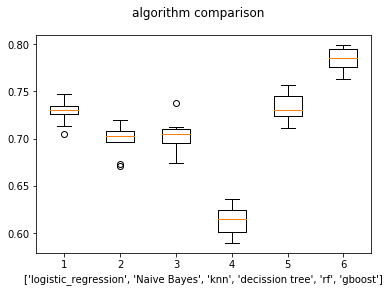

In [308]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_trains,y_trains,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

# feature engineering (average of pay amount+ avgbill amount)

In [309]:
df1.head(3)

,AGE,EDUCATION,ID,LIMIT_BAL,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month,train/test,avg_BillAmnt
0,25,2,25150,360000,2,-1,-1,-1,-1,-1,...,12590,3479,3446,8870,2020,27043,2,0.0,1,8557.666667
1,46,1,13470,240000,2,2,2,-1,-1,0,...,0,0,2240,0,2267,3074,2,0.0,1,1107.333333
2,41,2,3092,320000,1,0,0,0,0,0,...,5000,2000,2000,3000,3000,1500,2,0.0,1,41459.666667


In [310]:
df1['avg_pay_amt']=(df1['PAY_AMT1']+df1['PAY_AMT2']+df1['PAY_AMT3']+df1['PAY_AMT4']+df1['PAY_AMT5']+df1['PAY_AMT6'])/6
df1=df1.drop(columns=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1)

In [311]:
df1.head(2)

,AGE,EDUCATION,ID,LIMIT_BAL,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,default_payment_next_month,train/test,avg_BillAmnt,avg_pay_amt
0,25,2,25150,360000,2,-1,-1,-1,-1,-1,-1,2,0.0,1,8557.666667,9574.666667
1,46,1,13470,240000,2,2,2,-1,-1,0,-1,2,0.0,1,1107.333333,1263.500000


In [312]:
df_train=df1[df1['train/test']==1]
df_test=df1[df1['train/test']==0]
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

logistic_regression:0.728707 (0.000162)
Naive Bayes:0.703046 (0.000254)
knn:0.702083 (0.000160)
decission tree:0.605372 (0.000092)
rf:0.738858 (0.000208)
gboost:0.781449 (0.000180)


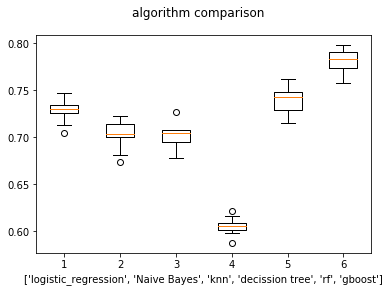

In [315]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_trains,y_trains,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

# feature significance

In [317]:
df.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,ID,LIMIT_BAL,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month,train/test
0,25,20952,12590,3479,3435,8870,2020,2,25150,360000,...,-1,12590,3479,3446,8870,2020,27043,2,0.0,1
1,46,456,0,0,2240,1681,2267,1,13470,240000,...,-1,0,0,2240,0,2267,3074,2,0.0,1
2,41,49846,53811,38717,35409,35036,35939,2,3092,320000,...,0,5000,2000,2000,3000,3000,1500,2,0.0,1
3,24,2675,0,0,0,0,0,2,13973,50000,...,-1,0,0,0,0,0,0,2,1.0,1
4,52,35861,18521,19385,20561,21261,21457,3,10567,80000,...,0,1500,1500,1500,1028,876,1449,1,0.0,1


In [320]:
age_0=df[df['default_payment_next_month']==0]['AGE']
age_1=df[df['default_payment_next_month']==1]['AGE']
from scipy.stats import ttest_ind
ttest_ind(age_0,age_1)

Ttest_indResult(statistic=-0.9657506548444429, pvalue=0.334180087912997)

# improving model after removing age

In [324]:
df1=df.copy()
df1['avg_BillAmnt']=(df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])/6
df1=df1.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','AGE'],axis=1)

In [329]:
df_train=df1[df1['train/test']==1]
df_test=df1[df1['train/test']==0]
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [330]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

logistic_regression:0.728877 (0.000166)
Naive Bayes:0.698537 (0.000233)
knn:0.705039 (0.000267)
decission tree:0.620361 (0.000046)
rf:0.728649 (0.000181)
gboost:0.784217 (0.000169)


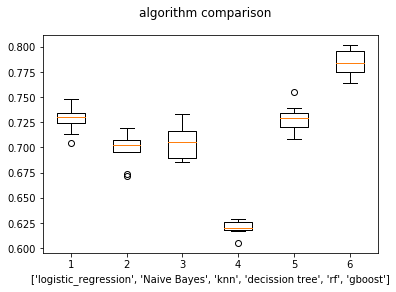

In [331]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_trains,y_trains,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

In [332]:
auc_val=[]
for val in range(1,100):
    gboost=GradientBoostingClassifier(n_estimators=val)
    result=cross_val_score(gboost,x_trains,y_trains,scoring='roc_auc',cv=5)
    auc_val.append(np.mean(result))

In [333]:
plt.figure(figsize=(25,6))
sns.lineplot(x=n_estimator,y=auc_val)
plt.show()

NameError: name 'n_estimator' is not defined

<Figure size 1800x432 with 0 Axes>

In [337]:
print(np.argmax(auc_val))
gboost=GradientBoostingClassifier(n_estimators=89)

89


In [338]:
gboost.fit(x_trains,y_trains)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=89,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [364]:
x_trains_df=pd.DataFrame(x_trains,columns=x_train.columns)
y_trains_pred=gboost.predict(x_trains_df)
roc_auc_score(y_trains,y_trains_pred)

TypeError: 'numpy.float64' object is not callable

In [377]:
x_tests=ss.transform(x_test)
y_pred=gboost.predict(x_tests)

In [378]:
r1=x_test['ID']
r2=pd.DataFrame(y_pred,columns=['default_payment_next_month'])
result=pd.concat([r1,r2],axis=1)
result.head()

,ID,default_payment_next_month
0,10178,0.0
1,5304,0.0
2,5187,0.0
3,14495,0.0
4,20444,0.0


In [380]:
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/analytics_vidhya_loan_defaulter/upload_result1.csv')

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# important features only

In [388]:
imp=pd.DataFrame(gboost.feature_importances_,columns=['sig_value'],index=x_train.columns)
imp

,sig_value
EDUCATION,0.009757
ID,0.015192
LIMIT_BAL,0.032820
MARRIAGE,0.002938
PAY_0,0.616562
PAY_2,0.081948
PAY_3,0.035617
PAY_4,0.013214
PAY_5,0.028070
PAY_6,0.017696


In [383]:
len(x_train.columns)

18

# improving model after removing age and sex

In [389]:
df1=df.copy()
df1['avg_BillAmnt']=(df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])/6
df1=df1.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','AGE','SEX'],axis=1)

In [390]:
df_train=df1[df1['train/test']==1]
df_test=df1[df1['train/test']==0]
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [391]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

logistic_regression:0.728271 (0.000160)
Naive Bayes:0.697973 (0.000237)
knn:0.707469 (0.000279)
decission tree:0.615704 (0.000218)
rf:0.731859 (0.000176)
gboost:0.783437 (0.000167)


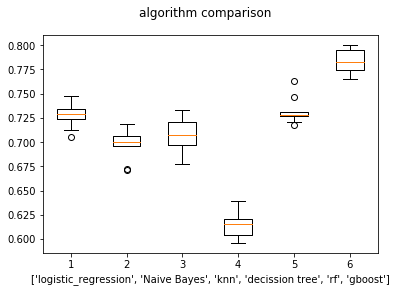

In [392]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_trains,y_trains,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

In [394]:
gboost=GradientBoostingClassifier(n_estimators=89)
gboost.fit(x_trains,y_trains)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=89,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [395]:
x_tests=ss.transform(x_test)
y_pred=gboost.predict(x_tests)

In [396]:
r1=x_test['ID']
r2=pd.DataFrame(y_pred,columns=['default_payment_next_month'])
result=pd.concat([r1,r2],axis=1)
result.head()

,ID,default_payment_next_month
0,10178,0.0
1,5304,0.0
2,5187,0.0
3,14495,0.0
4,20444,0.0


In [397]:
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/analytics_vidhya_loan_defaulter/upload_result2.csv')

# feature engineering ( average ofn pay_0 + bill amount)

In [398]:
df.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,ID,LIMIT_BAL,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month,train/test
0,25,20952,12590,3479,3435,8870,2020,2,25150,360000,...,-1,12590,3479,3446,8870,2020,27043,2,0.0,1
1,46,456,0,0,2240,1681,2267,1,13470,240000,...,-1,0,0,2240,0,2267,3074,2,0.0,1
2,41,49846,53811,38717,35409,35036,35939,2,3092,320000,...,0,5000,2000,2000,3000,3000,1500,2,0.0,1
3,24,2675,0,0,0,0,0,2,13973,50000,...,-1,0,0,0,0,0,0,2,1.0,1
4,52,35861,18521,19385,20561,21261,21457,3,10567,80000,...,0,1500,1500,1500,1028,876,1449,1,0.0,1


In [401]:
df1=df.copy()
df1['avg_BillAmnt']=(df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])/6

df1['avg_pay']=(df1['PAY_0']+df1['PAY_2']+df1['PAY_3']+df1['PAY_4']+df1['PAY_5']+df1['PAY_6'])/6
df1=df1.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1)

In [402]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 16 columns):
AGE                           30000 non-null int64
EDUCATION                     30000 non-null object
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
MARRIAGE                      30000 non-null object
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
SEX                           30000 non-null object
default_payment_next_month    21000 non-null float64
train/test                    30000 non-null int64
avg_BillAmnt                  30000 non-null float64
avg_pay                       30000 non-null float64
dtypes: float64(3), int64(10), object(3)
memory usage: 3.9+ MB


In [403]:
df_train=df1[df1['train/test']==1]
df_test=df1[df1['train/test']==0]
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [404]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

logistic_regression:0.712808 (0.000154)
Naive Bayes:0.637329 (0.000283)
knn:0.666835 (0.000190)
decission tree:0.601549 (0.000175)
rf:0.723420 (0.000248)
gboost:0.773525 (0.000113)


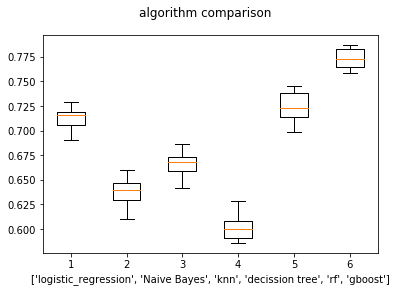

In [405]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_trains,y_trains,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

In [408]:
gboost=GradientBoostingClassifier(n_estimators=89)
gboost.fit(x_trains,y_trains)

x_tests=ss.transform(x_test)
y_pred=gboost.predict(x_tests)

In [409]:
r1=x_test['ID']
r2=pd.DataFrame(y_pred,columns=['default_payment_next_month'])
result=pd.concat([r1,r2],axis=1)
result.head()

,ID,default_payment_next_month
0,10178,0.0
1,5304,0.0
2,5187,0.0
3,14495,0.0
4,20444,0.0


In [410]:
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/analytics_vidhya_loan_defaulter/upload_result3.csv')

# base model

In [412]:
df1=df.copy()
df_train=df1[df1['train/test']==1]
df_test=df1[df1['train/test']==0]
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [413]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

logistic_regression:0.730345 (0.000153)
Naive Bayes:0.698133 (0.000225)
knn:0.704515 (0.000399)
decission tree:0.612766 (0.000049)
rf:0.734546 (0.000274)
gboost:0.784631 (0.000160)


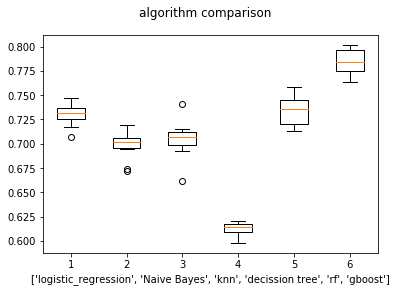

In [414]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_trains,y_trains,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

In [416]:
gboost=GradientBoostingClassifier(n_estimators=89)
gboost.fit(x_trains,y_trains)

x_tests=ss.transform(x_test)
y_pred=gboost.predict(x_tests)

In [417]:
r1=x_test['ID']
r2=pd.DataFrame(y_pred,columns=['default_payment_next_month'])
result=pd.concat([r1,r2],axis=1)
result.head()

,ID,default_payment_next_month
0,10178,0.0
1,5304,0.0
2,5187,0.0
3,14495,0.0
4,20444,0.0


In [418]:
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/analytics_vidhya_loan_defaulter/upload_result4.csv')

# feature engineeirng bill amount avrage

In [419]:
df1=df.copy()
df1['avg_BillAmnt']=(df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])/6
df1=df1.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

In [420]:
df_train=df1[df1['train/test']==1]
df_test=df1[df1['train/test']==0]
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [421]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

In [422]:
auc_val=[]
for val in range(1,100):
    gboost=GradientBoostingClassifier(n_estimators=val)
    result=cross_val_score(gboost,x_trains,y_trains,scoring='roc_auc',cv=5)
    auc_val.append(np.mean(result))

In [424]:
print(np.argmax(auc_val))
gboost=GradientBoostingClassifier(n_estimators=83)

83


In [425]:
gboost.fit(x_trains,y_trains)
x_tests=ss.transform(x_test)
y_pred=gboost.predict(x_tests)
r1=x_test['ID']
r2=pd.DataFrame(y_pred,columns=['default_payment_next_month'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/analytics_vidhya_loan_defaulter/upload_result5.csv')

# trying bagging classifier

In [426]:
df1=df.copy()
df1['avg_BillAmnt']=(df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])/6
df1=df1.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

In [427]:
df_train=df1[df1['train/test']==1]
df_test=df1[df1['train/test']==0]
y_train=df_train['default_payment_next_month']
x_train=df_train.drop(columns=['default_payment_next_month','train/test'],axis=1)
x_test=df_test.drop(columns=['default_payment_next_month','train/test'],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trains=ss.fit_transform(x_train)
y_trains=y_train.copy()
x_tests=ss.fit(x_test)

In [428]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import BaggingClassifier


lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=BernoulliNB()
gboost=GradientBoostingClassifier()

lr_bag=BaggingClassifier(base_estimator=lr,n_estimators=10)
nb_bag=BaggingClassifier(base_estimator=nb,n_estimators=10)
knn_bag=BaggingClassifier(base_estimator=knn,n_estimators=10)
dt_bag=BaggingClassifier(base_estimator=dt,n_estimators=10)
rf_bag=BaggingClassifier(base_estimator=rf,n_estimators=10)
#-----------------------------------------#
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))
models.append(('gboost',gboost))

models.append(('lr bagged',lr_bag))
models.append(('nb bagged',nb_bag))
models.append(('knn bagged',knn_bag))
models.append(('dt bagged',dt_bag))
models.append(('RF bagged',rf_bag))

logistic_regression:0.729265 (0.000168)
Naive Bayes:0.698775 (0.000238)
knn:0.702948 (0.000308)
decission tree:0.615610 (0.000229)
rf:0.735758 (0.000228)
gboost:0.784137 (0.000158)
lr bagged:0.729325 (0.000163)
nb bagged:0.699157 (0.000241)
knn bagged:0.712852 (0.000303)
dt bagged:0.729045 (0.000181)
RF bagged:0.771598 (0.000209)


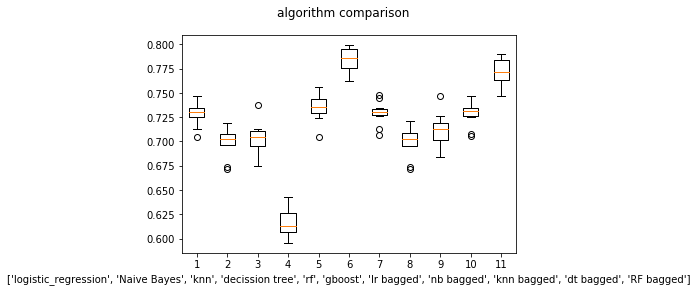

In [429]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_trains,y_trains,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

In [431]:
df.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,ID,LIMIT_BAL,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month,train/test
0,25,20952,12590,3479,3435,8870,2020,2,25150,360000,...,-1,12590,3479,3446,8870,2020,27043,2,0.0,1
1,46,456,0,0,2240,1681,2267,1,13470,240000,...,-1,0,0,2240,0,2267,3074,2,0.0,1
2,41,49846,53811,38717,35409,35036,35939,2,3092,320000,...,0,5000,2000,2000,3000,3000,1500,2,0.0,1
3,24,2675,0,0,0,0,0,2,13973,50000,...,-1,0,0,0,0,0,0,2,1.0,1
4,52,35861,18521,19385,20561,21261,21457,3,10567,80000,...,0,1500,1500,1500,1028,876,1449,1,0.0,1
